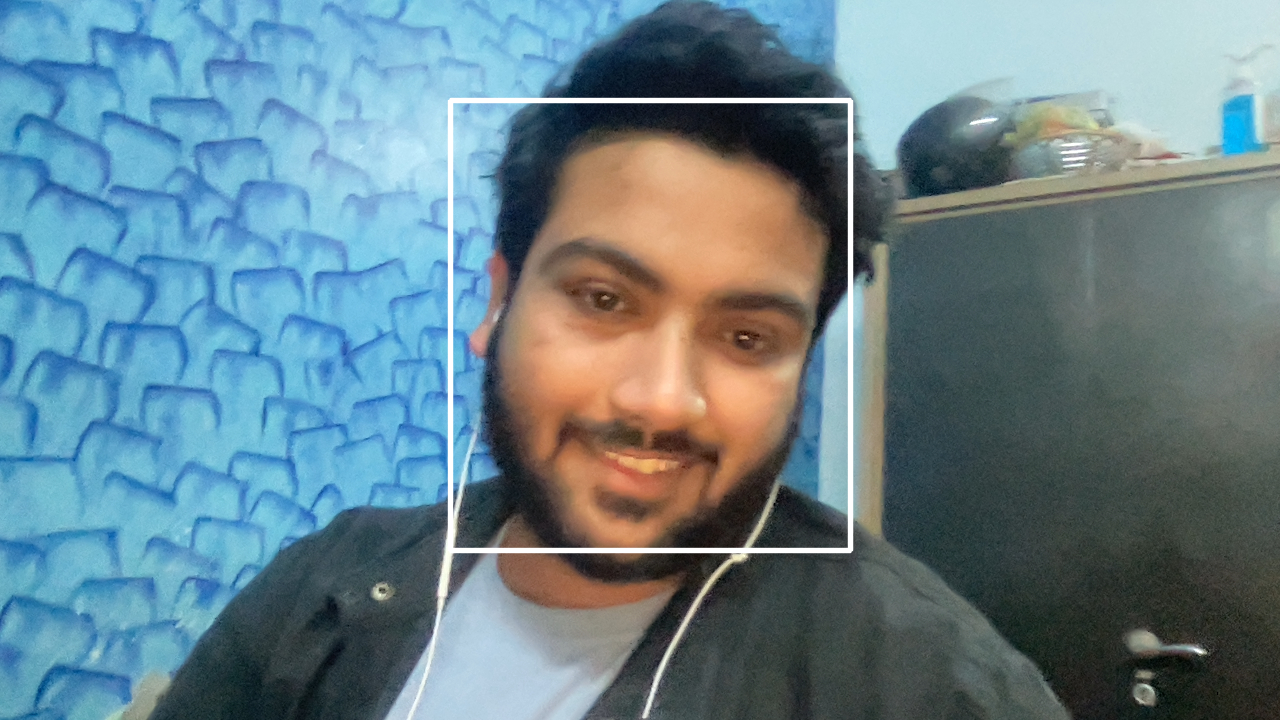

In [240]:
import cv2
import numpy as np
from PIL import Image
img =  cv2.imread('assets/me.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
c1 = (450,100)

c2 = (850,550)
img = cv2.rectangle(img, c1, c2, (255,255,255), thickness=3, lineType=cv2.LINE_AA)
Image.fromarray(img)


(240, 240, 3)


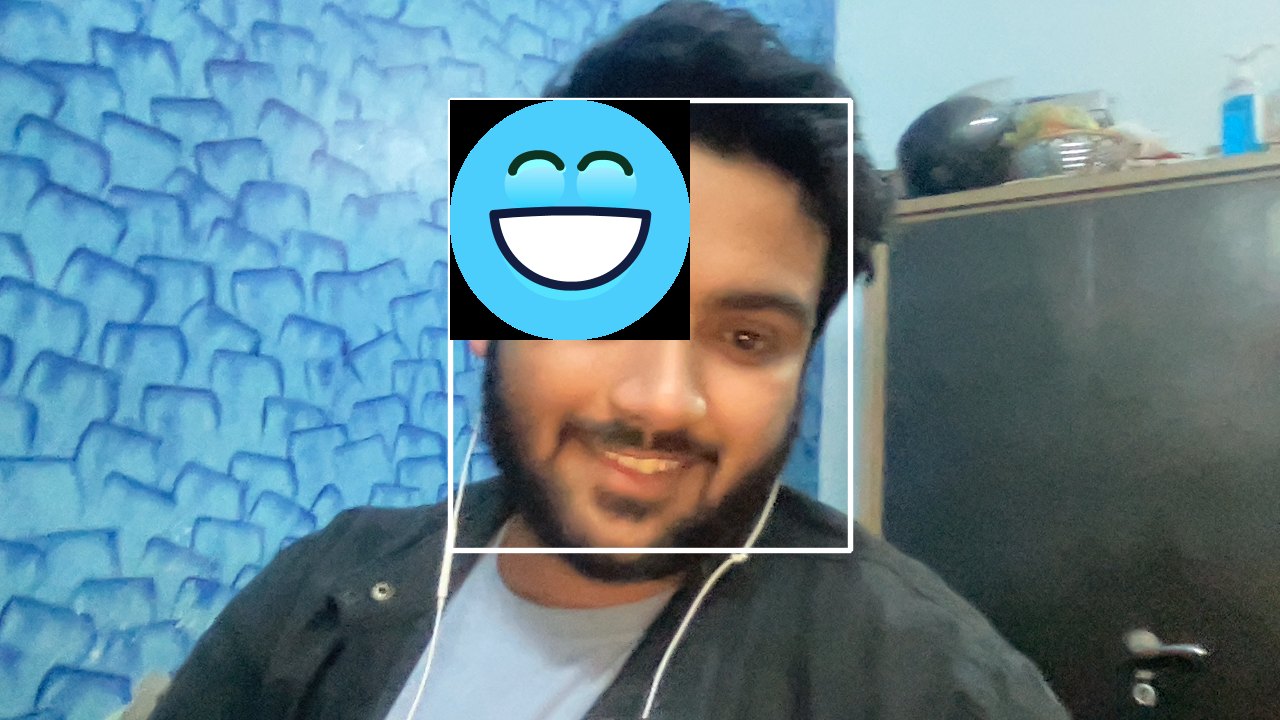

In [216]:
import cvzone
imgover = cv2.imread('converted.png', cv2.IMREAD_UNCHANGED)
# imgover = np.expand_dims(frames[0], axis=-1)
print(imgover.shape)

imgover = cv2.cvtColor(imgover, cv2.COLOR_BGRA2RGBA)
img2 = cvzone.overlayPNG(img, imgover, [450, 100])
Image.fromarray(img2)


In [191]:
frames = []

path = "assets/happy.png"
cap = cv2.VideoCapture(path)

ret = True
while ret:
    ret, img = cap.read()
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img)

In [ ]:
len(frames)

In [90]:
img = cv2.resize(initial,(240,240))
mask = cv2.resize(frames[0],(240,240))
res = cv2.bitwise_and(img,img,mask = mask)

error: OpenCV(4.5.4-dev) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [71]:
(450,100), (450+240, 100+240)

((450, 100),)

In [70]:
frames[0].shape

(240, 240, 3)

In [98]:
x = 450
y = 100

w = 120
h = 120

initial = img[y:y+h,x:x+w]

In [78]:
initial.shape

(240, 240, 3)

In [84]:
img.shape

(240, 240, 3)

In [85]:
mask.shape

(240, 240, 3)

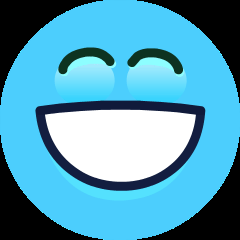

In [241]:
x = 450
y = 100

w = 240
h = 240

# roi = img[y:y+h,x:x+w]
src1 = img[y:y+h,x:x+w]
src2 = frames[1]
src2 = cv2.resize(src2, src1.shape[1::-1])

# src2[np.where((src2 ==[0,0,0]).all(axis=2))] = [255,255,255]
# dst = cv2.addWeighted(src1, 0.8, src2, 0.5, 0)
# dst = cv2.add(src1, src2)
# dst = cv2.bitwise_and(src1, src2)
Image.fromarray(src2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


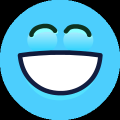

In [237]:
print(type(src1))
print(type(src2))

Image.fromarray(src2)

In [148]:
img[y:y+h,x:x+w] = dst

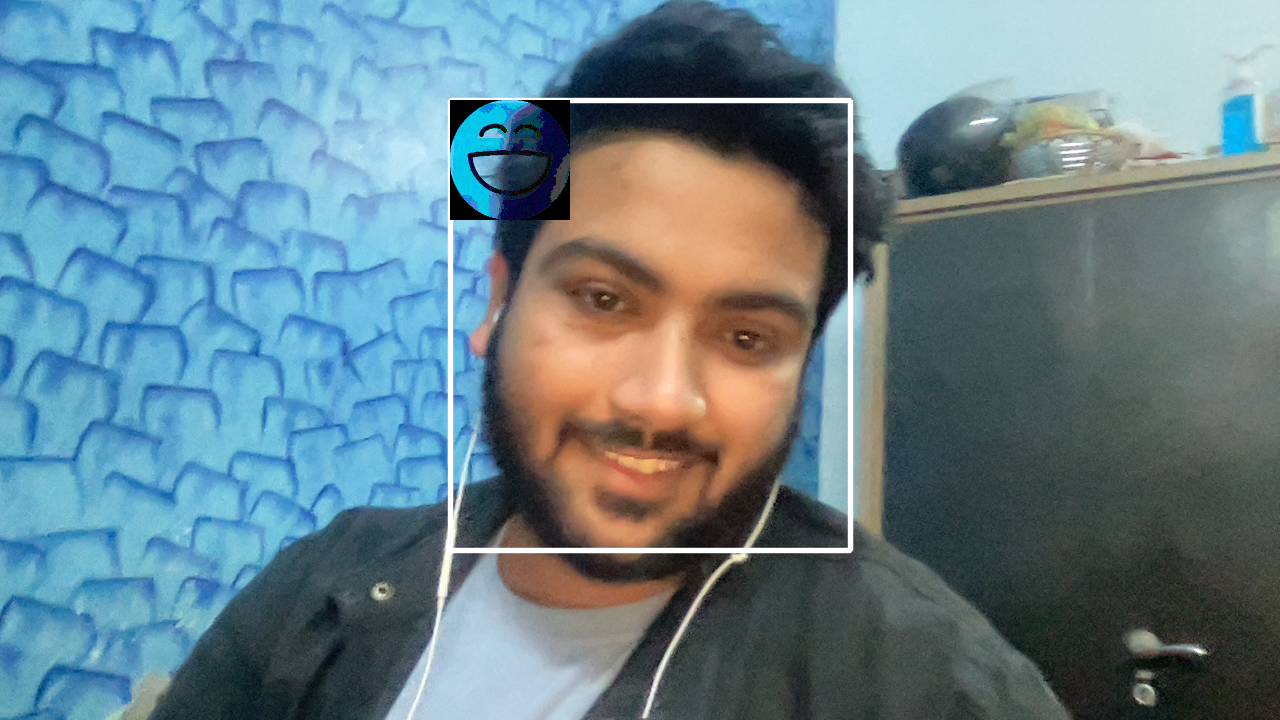

In [149]:
Image.fromarray(img)

In [138]:
dir(cvzone)

['ColorFinder',
 'ColorModule',
 'FPS',
 'LivePlot',
 'PID',
 'PIDModule',
 'PlotModule',
 'Utils',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cornerRect',
 'findContours',
 'overlayPNG',
 'putTextRect',
 'rotateImage',
 'stackImages']

In [201]:
import PIL
original = Image.fromarray(frames[0])
file_type = original.format
print(file_type)

original.save("converted.png", format="png")

None


In [213]:
img2gray = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

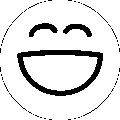

In [214]:
Image.fromarray(mask_inv)

In [218]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

In [219]:
img2_fg = cv2.bitwise_and(src2,src2,mask = mask)

In [221]:
rows,cols,channels = src2.shape
out_img = cv2.add(img1_bg,img2_fg)
roi[0:rows, 0:cols ] = out_img

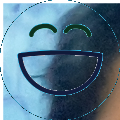

In [222]:
Image.fromarray(roi)

In [232]:
img1 = src2
img2 = src1
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
out_img = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = out_img
out_img = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = out_img

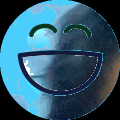

In [233]:
Image.fromarray(img1)

In [245]:
import cv2
import numpy as np


image = src1
frame = frames[0]



u_green = np.array([1, 1, 1])
l_green = np.array([0, 0, 0])

mask = cv2.inRange(frame, l_green, u_green)
res = cv2.bitwise_and(frame, frame, mask = mask)

f = frame - res
f = np.where(f == 0, image, f)

cv2.imshow("video", frame)
cv2.imshow("mask", f)
cv2.waitKey(25)


cv2.destroyAllWindows()


In [246]:
image.shape

(240, 240, 3)